# Project 3C: Exercise and CVD

### Scientific Question: Do people who exercise regularly have a lower risk of developing cardiovascular disease?

Cardiovascular disease is a leading cause of death and disease. In order to address this global burden, it is essential to understand risk factors and methods of prevention. In 2017, chronic lower respiratory disease and stroke were the third and fourth leading causes of death in the United States. Both diseases are considered a subset of CVD. Additionally, in the same year, 17.8 milion global deaths and 485.6 million cases were attributed to CVD.


The Global Burden of Disease conducted a study that associated low levels of physical activity with CVD (1). In addition to this study, hundreds of studies offer data to support that physical inactivity is associated with heart related diseases like stroke, heart failure, and cancer. Different measures of exercise factors including grip strength, physical activity, and cardiorespiratory fitness have been associated with an inverse relationship with cardiovascular events (2). Along with smoking cessation and healthy diet, physical activity is considered a method of primary prevention.


### Hypothesis: If individuals incorporate the WHO recommended physical activity into their lives, they will have a lower risk of developing cardio vascular disease. 


Physical activity can be difficult to measure. Most studies are observational and require finding a percent risk of CVD in a cohort. The World Health Organization (WHO) recommends that individuals incoporate no less than 150 minutes of moderate-intensity aerobic physical activity or 75 minutes of vigorous-intensity aerobic physical activity or an equivalent combination of both of these types of activity (3). 
In order to answer my scientific question and test my hypothesis, I used different percentages of lifetime risk of CVD from a study by Kubota et. al. This study found percentages of CVD lifetime risk for groups of males and females divided into the ages 45, 55, and 65 and also into poor, intermediate, and recommended levels of physical activty. Poor PA was considered 0 minutes per week of MVPA (moderate-vigorous physical activity) and recommended PA was considered >= 75 minutes of VPA (vigorous physical activity) and >= 150 minutes of MVPA. Using this data, I will use a t-test to calculate the p-value to compare either male or females in each age group with poor and recommended activity levels then visualize the data with a boxplot.

### Part 1: Load the Necessary Packages

Numpy: "stands for numerical python", library for working with large, multidimensional arrays and matrices and for using complex mathematical functions

Pandas: "Python Data Analysis Library", library for data analysis and machine learning techniques, provides 2d table object Dataframe

SciPy: library for mathematics, science, engineering, and technical concepts, built on top of numpy extension

matplotlib: library for creating various visualizations, extension of numpy



In [234]:
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import pandas as pd

### Part 2: Input Data from the NCBI Study and Generate Random Number Within the Specified Ranges

From Table 1 in the article by Kubota et. al, the ranges of data were inputed in a random number generator function. All numbers are percentages of CVD lifetime risk ranging from 23% to 56%. There were 7,252 women and 5,807 men in the study. Men and women ages 45, 55, and 65 were divided into nine different groups for poor, moderate, and recommended physical activity. Since the code I am using is for a two sample t-test, I used only six groups ages 45, 55, and 65 divided into two categories of fitness (poor and recommended). I divided the sample size of women and men by six then rounded to get an even number of samples for each data set. 

In [235]:
#use np.random.randint, a function of the random package, to generate random integers for 
#females and males ages 45, 55, and 65 

f45rec = np.random.randint(27, 33, 1208)
f45poor = np.random.randint(39, 45, 1208)

f55rec = np.random.randint(26, 33, 1208)
f55poor = np.random.randint(37, 44, 1208)

f65rec = np.random.randint(23, 30, 1208)
f65poor =  np.random.randint(32, 38, 1208)

m45rec =  np.random.randint(42, 45, 868)
m45poor =  np.random.randint(53, 56, 868)

m55rec = np.random.randint(39, 46, 868)
m55poor = np.random.randint(46, 53, 868)

m65rec = np.random.randint(33, 40, 868)
m65poor = np.random.randint(38, 46, 868)

In [236]:
#test to see if the numpy arrays were created properly

m45rec

#array was created properly for males 45 years old with the recommended activity levels 
#so will continue with creating code

array([44, 44, 44, 44, 42, 42, 43, 42, 44, 42, 44, 43, 42, 43, 42, 43, 44,
       42, 43, 43, 43, 44, 44, 43, 43, 42, 43, 43, 43, 43, 43, 44, 44, 42,
       42, 43, 42, 42, 42, 42, 44, 43, 43, 44, 42, 44, 44, 43, 44, 44, 44,
       44, 43, 42, 43, 42, 43, 44, 42, 43, 43, 44, 43, 42, 43, 44, 42, 42,
       43, 42, 44, 42, 43, 43, 42, 44, 44, 43, 42, 43, 44, 43, 43, 44, 44,
       43, 42, 43, 42, 44, 42, 42, 44, 43, 42, 42, 44, 42, 43, 44, 42, 43,
       43, 43, 44, 43, 42, 44, 42, 44, 43, 44, 44, 42, 42, 43, 42, 42, 44,
       42, 43, 44, 44, 44, 44, 44, 44, 43, 43, 44, 43, 42, 44, 42, 43, 43,
       42, 43, 42, 42, 42, 42, 42, 42, 42, 44, 43, 44, 43, 44, 44, 44, 42,
       43, 44, 44, 42, 42, 44, 43, 43, 44, 43, 43, 43, 42, 44, 44, 44, 44,
       44, 43, 44, 44, 42, 43, 44, 42, 44, 43, 43, 42, 42, 43, 43, 44, 42,
       44, 42, 44, 44, 43, 44, 44, 43, 43, 43, 42, 43, 42, 43, 44, 43, 43,
       43, 44, 44, 42, 44, 42, 43, 43, 43, 44, 44, 44, 42, 44, 42, 43, 44,
       42, 44, 44, 42, 44

### Part 3: Creating a Function for Ease that Calculates P-value

The code that calculates p-value is from (https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce). The code was then converted to a function for ease since I will be running the same code six different times to calculate the p-value between poor and recommended physical activity for each age group. I first define the function the choose variables to return. A t-test is a statistical test to compare the means of two groups (in my code example) and calculate if there is a statistical difference between the groups to test a hypothesis. The null hypothesis is the opposite of my hypothesis, it would be if individuals incorporate the recommended levels of physical inactivity, they will not have a lower risk of developing CVD. The alternative hypothesis is my hypothesis that I defined in the beginning of the notebook. The confidence interval is 95% which means alpha is 0.05. If the p-value is below 0.05, we reject the null hypothesis. If the p-value is above 0.05, we accept the null hypothesis.

In [237]:
#generating a p-value from the numpy arrays
#higher numbers correlate with an increased lifetime risk of CVD
#define variables and the number of individuals in the study

f45rec = np.random.randint(27, 33, 1208)         
f45poor = np.random.randint(39, 45, 1208)
n = 1208

#create new numpy arrays
PA1 = np.array(f45rec)
PA0 = np.array(f45poor)

#alternate hypothesis: If individuals incorporate physical activity into their lives, they will have a lower risk of developing cardio vascular disease. 
#null hypothesis: if individuals incorporate the recommended levels of physical inactivity, they will not have a lower risk of developing CVD.

#define the function for universal variables for each pvalue calculation

def pvaluestats (REC, POOR):
    #calculate the mean of data sets
    PA1_mean = np.mean(PA1)
    PA0_mean = np.mean(PA0)

    print("PA1 mean value:",PA1_mean)
    print("PA0 mean value:",PA0_mean)

    #calculate the standard deviation
    PA1_std = np.std(PA1)
    PA0_std = np.std(PA0)

    print("PA1 std value:",PA1_std)
    print("PA0 std value:", PA0_std)

    #perform a ttest between the data sets
    ttest,pval = ttest_ind(PA1, PA0)
    print("p-value",pval)

    if pval <0.05:
        print("we reject null hypothesis")
    else:
        print("we accept null hypothesis")
            
    #pick values to return
    return (PA1_std, PA0_std, PA1_mean, PA0_mean)


In [238]:
#for females 45 years old
for45yofemale = pvaluestats(f45rec, f45poor)

PA1 mean value: 29.4726821192053
PA0 mean value: 41.53145695364238
PA1 std value: 1.7029139687736767
PA0 std value: 1.7611528799880087
p-value 0.0
we reject null hypothesis


In [239]:
#for females 55 years old
for55yofemale = pvaluestats(f55rec, f55poor)

PA1 mean value: 29.4726821192053
PA0 mean value: 41.53145695364238
PA1 std value: 1.7029139687736767
PA0 std value: 1.7611528799880087
p-value 0.0
we reject null hypothesis


In [240]:
#for females 65 years old
for65yofemale = pvaluestats(f65rec, f65poor)

PA1 mean value: 29.4726821192053
PA0 mean value: 41.53145695364238
PA1 std value: 1.7029139687736767
PA0 std value: 1.7611528799880087
p-value 0.0
we reject null hypothesis


In [241]:
#for males 45 years old 
for45yomale = pvaluestats(m45rec, m45poor)

PA1 mean value: 29.4726821192053
PA0 mean value: 41.53145695364238
PA1 std value: 1.7029139687736767
PA0 std value: 1.7611528799880087
p-value 0.0
we reject null hypothesis


In [242]:
#for males 55 years old
for55yomale = pvaluestats(m55rec, m55poor)

PA1 mean value: 29.4726821192053
PA0 mean value: 41.53145695364238
PA1 std value: 1.7029139687736767
PA0 std value: 1.7611528799880087
p-value 0.0
we reject null hypothesis


In [243]:
#for males 65 years old
for65yomale = pvaluestats(m65rec, m65poor)

PA1 mean value: 29.4726821192053
PA0 mean value: 41.53145695364238
PA1 std value: 1.7029139687736767
PA0 std value: 1.7611528799880087
p-value 0.0
we reject null hypothesis


In [244]:
#to return the variables we specified earlier
print(for65yomale)

(1.7029139687736767, 1.7611528799880087, 29.4726821192053, 41.53145695364238)


### Part 4: Visualizing the Data

I used matplotlib to generate a boxplot of the data. The data is separated into different plots for females and males (reason below). On the X axis is different numbered groups by age and physical activity, on the Y axis is the percent of lifetime risk of CVD. I could not figure out how to title each box by age and activity level, but in the code, you can see which age group and physical activity level corresponds to the number of each boxplot. This plot is optimal for visualizing how different groups of data are from eachother by showing the five number summary - the minimum, first quartile (Q1), median, third quartile (Q3), and the maximum of the data.

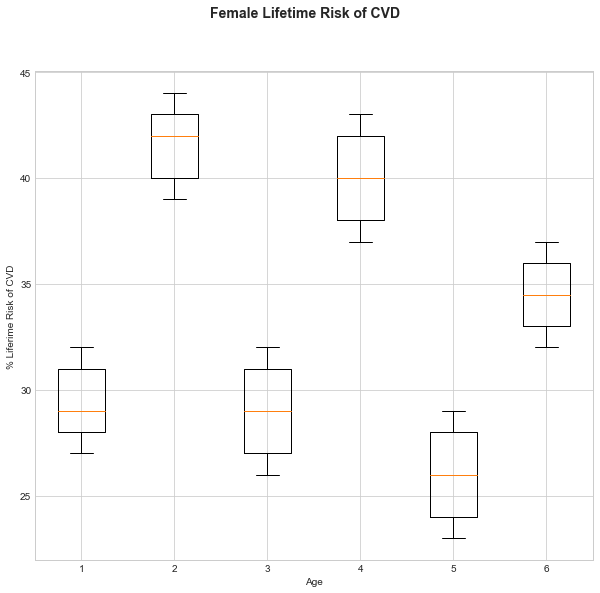

In [245]:
#define the data to plot
one=f45rec
two=f45poor
three=f55rec
four=f55poor
five=f65rec
six=f65poor

#name the data
to_plot=[one,two,three,four,five,six]

#customize the size of the plot and give the plot a title
fig=plt.figure(1,figsize=(10,9))
fig.suptitle('Female Lifetime Risk of CVD', fontsize=14, fontweight='bold')


ax=fig.add_subplot(111)
bp=ax.boxplot(to_plot)

#add titles to the axes 
ax.set_xlabel('Age')
ax.set_ylabel('% Liferime Risk of CVD')


fig.savefig('boxplot.png',bbox_inches='tight')


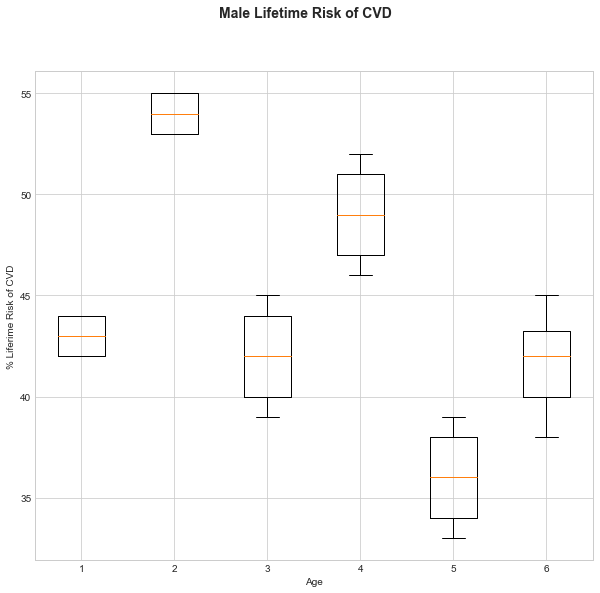

In [246]:
one=m45rec
two=m45poor
three=m55rec
four=m55poor
five=m65rec
six=m65poor

to_plot=[one,two,three,four,five,six]

fig=plt.figure(1,figsize=(10,9))
fig.suptitle('Male Lifetime Risk of CVD', fontsize=14, fontweight='bold')


ax=fig.add_subplot(111)
bp=ax.boxplot(to_plot)

ax.set_xlabel('Age')
ax.set_ylabel('% Liferime Risk of CVD')


fig.savefig('boxplot.png',bbox_inches='tight')


### Part 5: Analysis of the Results

The plots above show the distribution of the data for six different groups of people who participated in the study. The first graph shows lifetime % risk for men and the second shows lifetime % risk for women. The subjects were separated by their gender because men generally have a higher risk of CVD even when traditional risk factors (including physical activity) are considered (4). For both genders, boxes 1, 2, 3, 4, 5, and 6 corresponded with ages 45 recommended activty, 45 poor activity, 55 recommended activity, 55 poor activity, 65 recommended activity, and 65 poor activity. For both plots, boxes 1, 3, and 5 (age groups with the recommended levels of activity) are lower on the plot, corresponding with a lower % lifetime risk of CVD, while boxes 2, 4, and 6 (age groups with no activity) are higher on the plot, corresponding with a higher % lifetime risk of CVD. 

Additionally, all of the p-values generated earlier in the defined function in the code are below 0.05 which means that we can reject the null hypothesis. For each age group for females and males, the recommended and poor group for 45, 55, and 65 were computed in a t-test to generate the p-values. The data offers support to my hypothesis that individuals who incorporate the WHO recommended physical activity into their lives, have a lower risk of developing CVD.

### Part 6: References

1. https://www.ahajournals.org/doi/10.1161/CIR.0000000000000757

2. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3315253/

3. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5511058/#R40

4. https://www.health.harvard.edu/heart-health/throughout-life-heart-attacks-are-twice-as-common-in-men-than-women#:~:text=Researchers%20found%20that%20throughout%20life,mass%20index%2C%20and%20physical%20activity

5. https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce